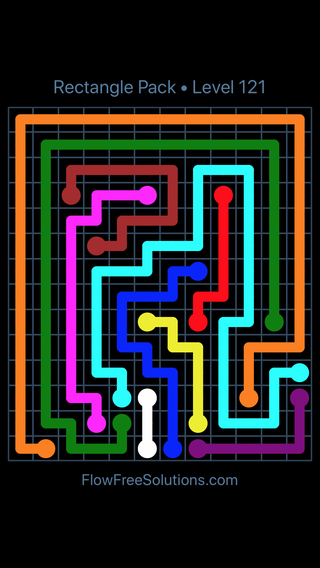

In [12]:
from PIL import Image
import numpy as np
import requests
from io import BytesIO


# url = "https://flowfreesolutions.com/solution-pictures/flow/regular/flow-regular-"
url= "https://flowfreesolutions.com/solution-pictures/flow/rectangle/flow-rectangle-"
url_end = ".png"
(cols, rows) = 12,14
response = requests.get(url+"121"+".png")
img = Image.open(BytesIO(response.content))
img

    # return "\n".join(rows_of_letters)


# if __name__ == "__main__":
#     for i in range(120,151):
#         print(f"Stealing image {i}...")
#         flow = steal_flow(url + str(i) + url_end)
#         # Save string to new file
#         with open(f"flows/{rows}x{cols}_{i}.txt", "w") as f:
#             f.write(flow)


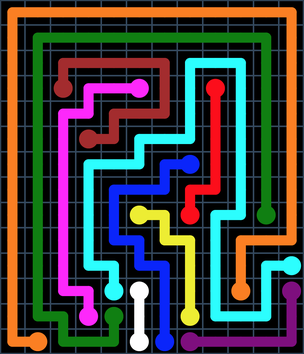

In [13]:

width, height = img.size

radius = (width-16)/2
cell_size = radius/(cols/2)
vradius = cell_size*(rows/2)

left = width/2-radius
top = height/2-vradius
right = width/2+radius
bottom = height/2+vradius
cropped_img = img.crop((left, top, right, bottom))
cropped_img

In [14]:


data = np.asarray(cropped_img)

# Get center pixel of each grid cell
samples = np.zeros((rows, cols, 3), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        y = int(i * cell_size + cell_size // 2)
        x = int(j * cell_size + cell_size // 2)
        samples[i, j] = data[y, x]

heads = np.zeros((rows, cols), dtype=bool)
for i in range(rows):
    for j in range(cols):
        y = int(i * cell_size + cell_size // 2)
        x = int(j * cell_size + cell_size // 2)
        heads[i, j] = (data[y, x]==data[y+int(cell_size//5), x]).all() and (data[y, x]==data[y-int(cell_size//5), x]).all() and (data[y, x]==data[y,x+int(cell_size//5)]).all() and (data[y, x]==data[y,x-int(cell_size//5)]).all()

flat_colors = samples.reshape(-1, 3)
flat_heads = heads.reshape(-1,1)
color_tuples = [tuple(rgb) for rgb in flat_colors]

unique_colors = sorted(set(color_tuples))
if len(unique_colors) > 26:
    raise ValueError("More than 26 unique colors, can't map to single letters.")

color_to_letter = {color: chr(ord('a') + i) for i, color in enumerate(unique_colors)}

letters = []
for i in range(len(color_tuples)):
    letters.append(color_to_letter[color_tuples[i]].capitalize() if flat_heads[i] else color_to_letter[color_tuples[i]])
rows_of_letters = ["".join(letters[i * cols:(i + 1) * cols]) for i in range(rows)]

In [15]:
rows_of_letters

['gggggggggggg',
 'gbbbbbbbbbbg',
 'gbeeeeecccbg',
 'gbEiiIecHcbg',
 'gbiieeechcbg',
 'gbiEeccchcbg',
 'gbicccaAhcbg',
 'gbicaaahhcbg',
 'gbicaFfHccBg',
 'gbicaaffcggg',
 'gbiccaafcgcC',
 'gbiiCJafcGcD',
 'gbbIBjaFcccd',
 'gGbbbJADdddd']